In [ ]:
from coppeliasim_zmqremoteapi_client import RemoteAPIClient
from tank import Tank

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


client = RemoteAPIClient()
sim = client.require('sim')

sim.setStepping(True)

my_tank = Tank(one_sensor=True)

# Define the fuzzy variables
distance = ctrl.Antecedent(np.arange(0, 10, .01), 'distance')
velocity = ctrl.Consequent(np.arange(0, 10, .1), 'velocity')

# Define membership functions for distance
distance['very_close'] = fuzz.trimf(distance.universe, [0, 0, 0.4])
distance['close'] = fuzz.trimf(distance.universe, [0.4, 1, 1])
distance['medium'] = fuzz.trimf(distance.universe, [1, 3, 5])
distance['far'] = fuzz.trimf(distance.universe, [3, 5, 10])

# Define membership functions for velocity
velocity['stop'] = fuzz.trimf(velocity.universe, [0, 0, 0])
velocity['slow'] = fuzz.trimf(velocity.universe, [0, 1, 3])
velocity['moderate'] = fuzz.trimf(velocity.universe, [1, 3, 5])
velocity['fast'] = fuzz.trimf(velocity.universe, [3, 5, 10])

# Define the fuzzy rules
rule1 = ctrl.Rule(distance['very_close'], velocity['stop'])
rule2 = ctrl.Rule(distance['close'], velocity['slow'])
rule3 = ctrl.Rule(distance['medium'], velocity['moderate'])
rule4 = ctrl.Rule(distance['far'], velocity['fast'])

# Create a control system and simulation
velocity_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
velocity_sim = ctrl.ControlSystemSimulation(velocity_ctrl)

sim.startSimulation()
while (t := sim.getSimulationTime()) < 30:
    dp = my_tank.read_proximity_sensors()['N']['detectedPoint']

    # Simulate the system
    velocity_sim.input['distance'] = float(dp)
    velocity_sim.compute()
    vel = velocity_sim.output['velocity']


    my_tank.forward(vel)
    sim.step()

sim.stopSimulation()

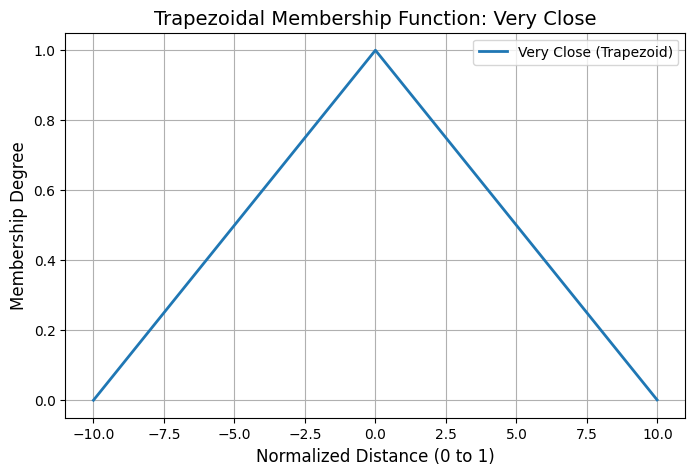

In [5]:

import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

distance = ctrl.Antecedent(np.arange(-10, 10, .01), 'distance')
# Define the trapezoidal membership function for 'very_close'
very_close_trapezoid = fuzz.trimf(distance.universe, [-10, 0, 10])

# Plot the trapezoidal membership function
plt.figure(figsize=(8, 5))
plt.plot(distance.universe, very_close_trapezoid, label='Very Close (Trapezoid)', linewidth=2)
plt.title("Trapezoidal Membership Function: Very Close", fontsize=14)
plt.xlabel("Normalized Distance (0 to 1)", fontsize=12)
plt.ylabel("Membership Degree", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


In [1]:
from coppeliasim_zmqremoteapi_client import RemoteAPIClient
from tank import Tank

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


client = RemoteAPIClient()
sim = client.require('sim')

sim.setStepping(True)

my_tank = Tank()

sensor_names = ['EN', 'ES', 'NE', 'NW', 'SE', 'SW', 'WN', 'WS']
sensor_data = {}

sim.startSimulation()
while (t := sim.getSimulationTime()) < 5:

    sensores_raw = my_tank.read_proximity_sensors()
    for sn in sensor_names:
        sensor_data[sn] = sensores_raw[sn]

    my_tank.turn_left(10)

    sim.step()

sim.stopSimulation()

ceated a tank!
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10
-10
10


In [8]:
from coppeliasim_zmqremoteapi_client import RemoteAPIClient

client = RemoteAPIClient()
sim = client.require('sim')

sim.setStepping(True)

sensor_names = ['EN', 'ES', 'NE', 'NW', 'SE', 'SW', 'WN', 'WS']

left_front_handle   = sim.getObject('/left_front')
left_back_handle    = sim.getObject('/left_back')
right_back_handle   = sim.getObject('/right_back')
right_front_handle  = sim.getObject('/right_front')

sim.setJointForce(left_back_handle, 5)
sim.setJointForce(left_front_handle, 5)

sim.setJointForce(right_back_handle, 0)
sim.setJointForce(right_front_handle, 0)

sim.setJointTargetVelocity(left_back_handle, 5)
sim.setJointTargetVelocity(left_front_handle, 5)

sim.setJointTargetVelocity(right_back_handle, 0)
sim.setJointTargetVelocity(right_front_handle, 0)

sim.startSimulation()
while (t := sim.getSimulationTime()) < 10:

    sim.step()

sim.stopSimulation()